# Problem Statement
Perform clustering (hierarchical,K means clustering and DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

## 1. Import Necessary Libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 2. Import Dataset

In [2]:
crime_data_1 = pd.read_csv('crime_data.csv')
crime_data_1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## 3. Data Understanding

###  3.1 Initial Analysis

In [3]:
crime_data_1.shape

(50, 5)

In [4]:
crime_data_1.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime_data_1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### 3.2 Data Preprocessing

For  using Euclidean distance, there is a need to bring all datapoints to one scale.

In [8]:
from sklearn.preprocessing import normalize
scaled_data = pd.DataFrame(normalize(crime_data_1.iloc[:,1:]),columns=['Murder','Assault','UrbanPop','Rape'])

In [9]:
scaled_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [10]:
scaled_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.040677,0.881704,0.409630,0.119341
std,0.015018,0.101645,0.166944,0.035642
min,0.012626,0.473419,0.132112,0.042620
25%,0.027485,0.850453,0.279234,0.092741
50%,0.039406,0.907323,0.395010,0.117441
75%,0.049811,0.952031,0.508929,0.139552
max,0.079346,0.989371,0.854213,0.207893


# Hierarchical Clustering

In [11]:
link = sch.linkage(scaled_data,method='single', metric='euclidean')

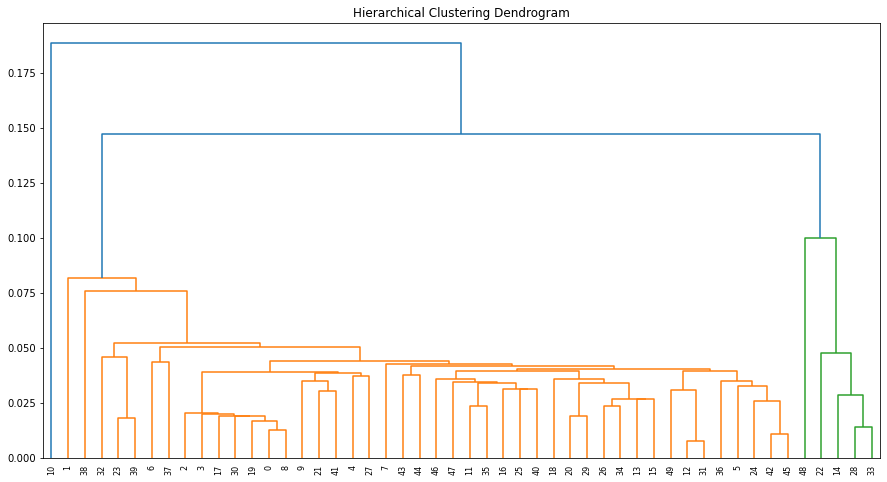

In [12]:
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
dendogram = sch.dendrogram(link)

###### For n_clusters = 3

In [15]:
hc_cluster_model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [16]:
y_hc = hc_cluster_model.fit_predict(scaled_data)

In [17]:
cluster = pd.DataFrame(y_hc,columns=['clusterID'])
cluster.head()

,clusterID
0,2
1,2
2,2
3,2
4,2


In [18]:
cluster.value_counts()

clusterID
2            44
0             5
1             1
dtype: int64

In [19]:
44/50

0.88

##### Here, 88% of the points are grouped in one cluster, So this is not a good clustering.

###### For n_clusters = 2

In [20]:
hc_cluster_model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')

y_hc = hc_cluster_model.fit_predict(scaled_data)

cluster = pd.DataFrame(y_hc,columns=['clusterID'])
cluster.head()

cluster.value_counts()

clusterID
0            49
1             1
dtype: int64

###### For n_clusters = 3, affinity='cosine', linkage='complete'

In [21]:
crime_data = crime_data_1.copy()
print(crime_data.columns)
print(crime_data.dtypes)

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')
Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object


In [22]:
crime_data.drop('Unnamed: 0',axis=1,inplace=True)
crime_data.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


In [23]:
hc_cluster_model = AgglomerativeClustering(n_clusters=3,affinity='cosine',linkage='complete')

y_hc = hc_cluster_model.fit_predict(crime_data)

cluster = pd.DataFrame(y_hc,columns=['clusterID'])
cluster.head()

cluster.value_counts()

clusterID
0            33
2            11
1             6
dtype: int64

###### n_clusters=5,affinity='l1',linkage='complete'

In [24]:
crime_data.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


In [25]:
#scaled data with l1 affinity
hc_cluster_model = AgglomerativeClustering(n_clusters=5,affinity='l1',linkage='complete')

y_hc = hc_cluster_model.fit_predict(scaled_data)

cluster = pd.DataFrame(y_hc,columns=['clusterID'])
cluster.head()

cluster.value_counts().sort_index()

clusterID
0            20
1             5
2            13
3             1
4            11
dtype: int64

In [26]:
#original, non-scaled data with l1 affinity
hc_cluster_model = AgglomerativeClustering(n_clusters=5,affinity='l1',linkage='complete')

y_hc = hc_cluster_model.fit_predict(crime_data)

cluster = pd.DataFrame(y_hc,columns=['clusterID'])
cluster.head()

cluster.value_counts().sort_index()

clusterID
0            13
1            14
2            10
3             2
4            11
dtype: int64

In [27]:
crime_data['clusterID'] = cluster
crime_data.groupby('clusterID').agg('mean')

,Murder,Assault,UrbanPop,Rape
clusterID,,,,
0,8.538462,175.461538,70.461538,22.584615
1,11.471429,263.500000,69.142857,29.000000
2,2.950000,62.700000,53.900000,11.510000
3,14.200000,336.000000,62.500000,24.000000
4,5.445455,115.363636,66.272727,18.081818


In [28]:
# to find outlier
crime_data[crime_data['clusterID']==3]

,Murder,Assault,UrbanPop,Rape,clusterID
8,15.4,335,80,31.9,3
32,13.0,337,45,16.1,3


In [29]:
#complete table to check clusterID with locationswise
crime_data.insert(loc=4,column='Location',value=crime_data_1['Unnamed: 0'])
crime_data

,Murder,Assault,UrbanPop,Rape,Location,clusterID
0,13.2,236,58,21.2,Alabama,1
1,10.0,263,48,44.5,Alaska,1
2,8.1,294,80,31.0,Arizona,1
3,8.8,190,50,19.5,Arkansas,0
4,9.0,276,91,40.6,California,1
5,7.9,204,78,38.7,Colorado,0
6,3.3,110,77,11.1,Connecticut,4
7,5.9,238,72,15.8,Delaware,1
8,15.4,335,80,31.9,Florida,3
9,17.4,211,60,25.8,Georgia,0


### conclusion
5 clusters are formed but, third cluster just contains 2 datapoints, which can be reffered as outlier in the data.

# Kmeans Clustering

In [68]:
crime_data_1 = pd.read_csv('crime_data.csv')
crime_data = crime_data_1.copy()
crime_data.drop('Unnamed: 0',axis=1,inplace=True)

### Data Preprocessing

google -  does kmeans only use euclidean distance

### in kmeans, we will use only scaled data, because distance metric is just Euclidean.
Sklearn Kmeans uses the Euclidean distance. It has no metric parameter.

Can we use Manhattan distance in k-means clustering?
If the manhattan distance metric is used in k-means clustering, the algorithm still yields a centroid with the median value for each dimension, rather than the mean value for each dimension as for Euclidean distance.07-Apr-2015

What is the benefit of using Manhattan distance for K-medoid than using ...https://stats.stackexchange.com › questions › what-is-the-b.

In [69]:
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [70]:
scaler = MinMaxScaler()
scaler.fit_transform(crime_data)
crime_data = pd.DataFrame(crime_data)

In [71]:
crime_data = pd.DataFrame(normalize(crime_data),columns=['Murder','Assault','UrbanPop','Rape'])
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


## The optimal number of clusters in KMeans clustering algorithm

#### 1. ELBOW Method

In [72]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(crime_data)
    wcss.append(round(kmeans.inertia_))

In [73]:
wcss

[2, 1, 0, 0, 0, 0, 0, 0, 0, 0]

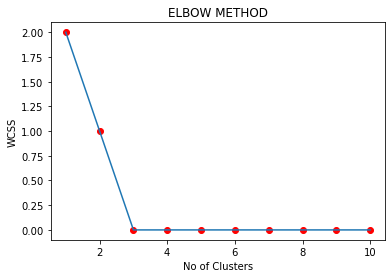

In [74]:
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color='red')
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

### Inference : k = 2,3

#### 2. silhoutte score
max silhoutte score, better the performance

In [75]:
from sklearn.metrics import silhouette_score
silhoutte_value = []
for i in range(2,11):
    kmean = KMeans(n_clusters=i,random_state=12)
    kmean.fit(crime_data)
    silhoutte_value.append(silhouette_score(crime_data,kmean.labels_))

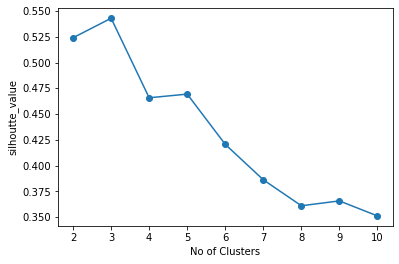

In [76]:
plt.plot(range(2,11),silhoutte_value)
plt.scatter(range(2,11),silhoutte_value)
plt.xlabel('No of Clusters')
plt.ylabel('silhoutte_value')
plt.show()

### Inference : k = 3

#### 3. Calinski Harabasz score

the higher the score , the better the performances.

In [77]:
from sklearn.metrics import calinski_harabasz_score
calinski_score = []
for i in range(2,11):
    kmean = KMeans(n_clusters=i,random_state=12)
    kmean.fit(crime_data)
    calinski_score.append(calinski_harabasz_score(crime_data,kmean.labels_))

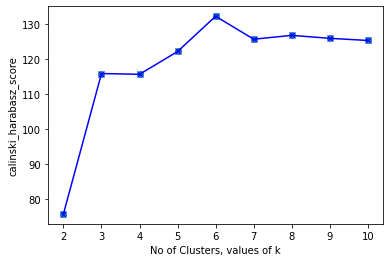

In [78]:
plt.plot(range(2,11),calinski_score,'bx-')
plt.scatter(range(2,11),calinski_score)
plt.xlabel('No of Clusters, values of k')
plt.ylabel('calinski_harabasz_score')
plt.show()

### Inference: k = 6

##### since, majority is k = 3, Let us build Kmeans cluster model with 2 clusters.

## The optimal number of clusters in KMeans clustering algorithm
Hyperparameter tweaking : algorithm = auto

#### 1. ELBOW Method

In [79]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12,algorithm='auto')
    kmeans.fit(crime_data)
    wcss.append(round(kmeans.inertia_))

In [80]:
wcss

[2, 1, 0, 0, 0, 0, 0, 0, 0, 0]

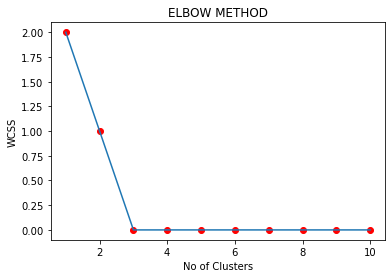

In [81]:
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color='red')
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

### Inference : k = 3

#### 2. silhoutte score

In [82]:
from sklearn.metrics import silhouette_score
silhoutte_value = []
for i in range(2,11):
    kmean = KMeans(n_clusters=i,random_state=12,algorithm='auto')
    kmean.fit(crime_data)
    silhoutte_value.append(silhouette_score(crime_data,kmean.labels_))

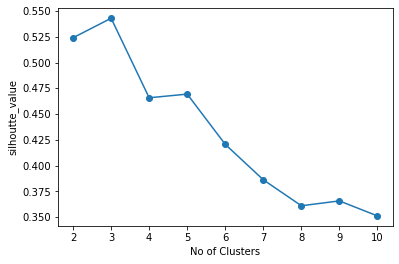

In [83]:
plt.plot(range(2,11),silhoutte_value)
plt.scatter(range(2,11),silhoutte_value)
plt.xlabel('No of Clusters')
plt.ylabel('silhoutte_value')
plt.show()

### Inference : k = 2,3

#### 3. Calinski Harabasz score

In [84]:
from sklearn.metrics import calinski_harabasz_score
calinski_score = []
for i in range(2,11):
    kmean = KMeans(n_clusters=i,random_state=12,algorithm='auto')
    kmean.fit(crime_data)
    calinski_score.append(calinski_harabasz_score(crime_data,kmean.labels_))

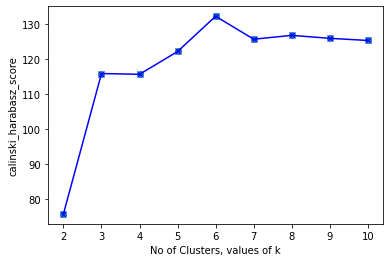

In [85]:
plt.plot(range(2,11),calinski_score,'bx-')
plt.scatter(range(2,11),calinski_score)
plt.xlabel('No of Clusters, values of k')
plt.ylabel('calinski_harabasz_score')
plt.show()

### Inference: k = 6

## after tweaking the hyperparamter, algorithm as well, the value of k is 2,3,6

###### For k =2

In [86]:
# create clusters
kmean_cluster = KMeans(n_clusters=2,random_state=12)

In [87]:
y_kmean = kmean_cluster.fit_predict(crime_data) + 1
y_kmean

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1])

In [88]:
cluster = pd.DataFrame(y_kmean,columns=['clusterID'])

In [89]:
cluster['clusterID'].unique()

array([1, 2])

In [90]:
crime_data['clusterID'] = cluster
crime_data.head()

,Murder,Assault,UrbanPop,Rape,clusterID
0,0.054031,0.966016,0.237411,0.086778,1
1,0.036872,0.969739,0.176987,0.164081,1
2,0.026439,0.959624,0.261122,0.101185,1
3,0.044528,0.961392,0.252998,0.098669,1
4,0.030657,0.940134,0.309972,0.138295,1


In [91]:
crime_data.insert(loc=0, column='location', value=crime_data_1['Unnamed: 0'])
crime_data.head()

,location,Murder,Assault,UrbanPop,Rape,clusterID
0,Alabama,0.054031,0.966016,0.237411,0.086778,1
1,Alaska,0.036872,0.969739,0.176987,0.164081,1
2,Arizona,0.026439,0.959624,0.261122,0.101185,1
3,Arkansas,0.044528,0.961392,0.252998,0.098669,1
4,California,0.030657,0.940134,0.309972,0.138295,1


In [92]:
crime_data[crime_data['clusterID']==1]

,location,Murder,Assault,UrbanPop,Rape,clusterID
0,Alabama,0.054031,0.966016,0.237411,0.086778,1
1,Alaska,0.036872,0.969739,0.176987,0.164081,1
2,Arizona,0.026439,0.959624,0.261122,0.101185,1
3,Arkansas,0.044528,0.961392,0.252998,0.098669,1
4,California,0.030657,0.940134,0.309972,0.138295,1
5,Colorado,0.035594,0.919142,0.351437,0.174367,1
7,Delaware,0.023674,0.954965,0.288897,0.063397,1
8,Florida,0.044478,0.967547,0.231056,0.092134,1
9,Georgia,0.078534,0.952332,0.270805,0.116446,1
11,Idaho,0.019640,0.906483,0.407917,0.107267,1


In [93]:
crime_data[crime_data['clusterID']==2]

,location,Murder,Assault,UrbanPop,Rape,clusterID
6,Connecticut,0.024486,0.816202,0.571341,0.082362,2
10,Hawaii,0.054546,0.473419,0.854213,0.207893,2
13,Indiana,0.054447,0.854521,0.491539,0.158805,2
14,Iowa,0.027251,0.693660,0.706047,0.139971,2
15,Kansas,0.044795,0.858568,0.492743,0.134385,2
18,Maine,0.021483,0.849097,0.521734,0.079795,2
20,Massachusetts,0.025527,0.864425,0.493128,0.094565,2
22,Minnesota,0.027317,0.728452,0.667747,0.150749,2
26,Nebraska,0.035662,0.845935,0.514196,0.136842,2
28,New Hampshire,0.026088,0.708107,0.695684,0.118018,2


In [94]:
print('unique cluster IDs : ',crime_data['clusterID'].unique())
print('unique cluster IDs with calue counts:\n',crime_data['clusterID'].value_counts())

unique cluster IDs :  [1 2]
unique cluster IDs with calue counts:
 1    33
2    17
Name: clusterID, dtype: int64


In [95]:
crime_data.groupby('clusterID').agg('mean')

,Murder,Assault,UrbanPop,Rape
clusterID,,,,
1,0.043933,0.936323,0.313561,0.112347
2,0.034358,0.775678,0.596118,0.132916


In [96]:
crime_data.groupby('clusterID').agg('median')

,Murder,Assault,UrbanPop,Rape
clusterID,,,,
1,0.041163,0.941927,0.309972,0.108651
2,0.030455,0.820702,0.547706,0.134385


In [97]:
crime_data.groupby('clusterID').agg('std')

,Murder,Assault,UrbanPop,Rape
clusterID,,,,
1,0.015228,0.031939,0.091170,0.034468
2,0.012753,0.107256,0.112884,0.034895


###### clusterID
* 1 : high crime rate
* 2 : moderate crime rate

## conclusion:
The std for 2 clusters are near to each other, so we can conclude that, the murder rate, assault rate more at loactions high crime rate than that of moderate crime rate while rape cases are more in moderate crime rate.

In [98]:
crime_data.head()

,location,Murder,Assault,UrbanPop,Rape,clusterID
0,Alabama,0.054031,0.966016,0.237411,0.086778,1
1,Alaska,0.036872,0.969739,0.176987,0.164081,1
2,Arizona,0.026439,0.959624,0.261122,0.101185,1
3,Arkansas,0.044528,0.961392,0.252998,0.098669,1
4,California,0.030657,0.940134,0.309972,0.138295,1


In [99]:
crime_data['clusterID']=crime_data['clusterID'].map({1:'HighCrimeRate',2:'ModerateCrimeRate'})

In [100]:
crime_data.head()

,location,Murder,Assault,UrbanPop,Rape,clusterID
0,Alabama,0.054031,0.966016,0.237411,0.086778,HighCrimeRate
1,Alaska,0.036872,0.969739,0.176987,0.164081,HighCrimeRate
2,Arizona,0.026439,0.959624,0.261122,0.101185,HighCrimeRate
3,Arkansas,0.044528,0.961392,0.252998,0.098669,HighCrimeRate
4,California,0.030657,0.940134,0.309972,0.138295,HighCrimeRate


In [101]:
# to get location names of high crime rate 
locations_high_crime_rate = crime_data.loc[crime_data['clusterID'] == 'HighCrimeRate'].iloc[:,0]
list(locations_high_crime_rate)

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Delaware',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Kentucky',
 'Louisiana',
 'Maryland',
 'Michigan',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nevada',
 'New Mexico',
 'New York',
 'North Carolina',
 'Oklahoma',
 'Oregon',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wyoming']

In [102]:
len(list(locations_high_crime_rate))

33

# Out of 50 states in US, the crime rate is high in 33 states.

###### For k =3

In [103]:
crime_data_1 = pd.read_csv('crime_data.csv')
crime_data = crime_data_1.copy()
crime_data.drop('Unnamed: 0',axis=1,inplace=True)

In [104]:
# create clusters
kmean_cluster = KMeans(n_clusters=3,random_state=12)

In [105]:
y_kmean = kmean_cluster.fit_predict(crime_data)+1
y_kmean

array([3, 3, 3, 1, 3, 1, 2, 3, 3, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       2, 3, 1, 2, 2, 3, 2, 1, 3, 3, 3, 2, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1])

In [106]:
cluster = pd.DataFrame(y_kmean,columns=['clusterID'])

In [107]:
cluster['clusterID'].unique()

array([3, 1, 2])

In [108]:
crime_data['clusterID'] = cluster
crime_data.head()

,Murder,Assault,UrbanPop,Rape,clusterID
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3


In [109]:
crime_data.insert(loc=0, column='location', value=crime_data_1['Unnamed: 0'])
crime_data.head()

,location,Murder,Assault,UrbanPop,Rape,clusterID
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [110]:
print('unique cluster IDs : ',crime_data['clusterID'].unique())
print('unique cluster IDs with calue counts:\n{}'.format(crime_data['clusterID'].value_counts()))

unique cluster IDs :  [3 1 2]
unique cluster IDs with calue counts:
2    20
3    16
1    14
Name: clusterID, dtype: int64


In [111]:
crime_data.groupby('clusterID').agg('mean')

,Murder,Assault,UrbanPop,Rape
clusterID,,,,
1,8.214286,173.285714,70.642857,22.842857
2,4.270000,87.550000,59.750000,14.390000
3,11.812500,272.562500,68.312500,28.375000


## conclusion:
The murder cases, assault cases and rape cases are max in 3nd cluster ID, though its population is less than that of in cluster 1.

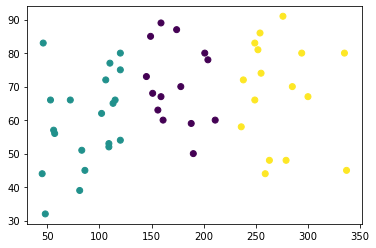

In [112]:
plt.scatter(crime_data.iloc[:,2],crime_data.iloc[:,3],c = y_kmean)

In [113]:
crime_data['clusterID']=crime_data['clusterID'].map({3:'HighCrimeCases',1:'ModerateCrimeCases',2:'LowCrimeCases'})
crime_data.head()

,location,Murder,Assault,UrbanPop,Rape,clusterID
0,Alabama,13.2,236,58,21.2,HighCrimeCases
1,Alaska,10.0,263,48,44.5,HighCrimeCases
2,Arizona,8.1,294,80,31.0,HighCrimeCases
3,Arkansas,8.8,190,50,19.5,ModerateCrimeCases
4,California,9.0,276,91,40.6,HighCrimeCases


In [114]:
# to get location names of high crime cases 
locations_high_crime_cases = crime_data.loc[crime_data['clusterID'] == 'HighCrimeCases'].iloc[:,0]
locations_high_crime_cases

0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
Name: location, dtype: object

In [115]:
len(list(locations_high_crime_cases))

16

# Out of 50 states in US, the crime cases is high in 16 states.

###### For k = 6

In [116]:
crime_data_1 = pd.read_csv('crime_data.csv')
crime_data = crime_data_1.copy()
crime_data.drop('Unnamed: 0',axis=1,inplace=True)

In [117]:
# create clusters
kmean_cluster = KMeans(n_clusters=6,random_state=12)
y_kmean = kmean_cluster.fit_predict(crime_data)+1
y_kmean

array([2, 2, 4, 6, 2, 6, 5, 2, 4, 6, 3, 5, 2, 5, 3, 5, 5, 2, 3, 4, 1, 2,
       3, 2, 6, 5, 5, 2, 3, 1, 2, 2, 4, 3, 5, 1, 1, 5, 1, 2, 3, 6, 6, 5,
       3, 1, 1, 3, 3, 1])

In [118]:
cluster = pd.DataFrame(y_kmean,columns=['clusterID'])
cluster['clusterID'].unique()

array([2, 4, 6, 5, 3, 1])

In [119]:
crime_data['clusterID'] = cluster
crime_data.head()

,Murder,Assault,UrbanPop,Rape,clusterID
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,6
4,9.0,276,91,40.6,2


In [120]:
crime_data.insert(loc=0, column='location', value=crime_data_1['Unnamed: 0'])
crime_data.head()

,location,Murder,Assault,UrbanPop,Rape,clusterID
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,6
4,California,9.0,276,91,40.6,2


In [121]:
print('unique cluster IDs : ',crime_data['clusterID'].unique())
print('unique cluster IDs with calue counts:\n{}'.format(crime_data['clusterID'].value_counts()))

unique cluster IDs :  [2 4 6 5 3 1]
unique cluster IDs with calue counts:
2    12
5    10
3    10
1     8
6     6
4     4
Name: clusterID, dtype: int64


In [122]:
crime_data.groupby('clusterID').agg('mean')

,Murder,Assault,UrbanPop,Rape
clusterID,,,,
1,5.750000,156.750000,74.000000,19.400000
2,11.766667,257.916667,68.416667,28.933333
3,2.950000,62.700000,53.900000,11.510000
4,11.950000,316.500000,68.000000,26.700000
5,5.590000,112.400000,65.600000,17.270000
6,11.500000,195.333333,66.166667,27.433333


###### conclusion
The murder and assault cases are maximum in 4th cluster, whiel rape cases are maximum in 2nd cluster.

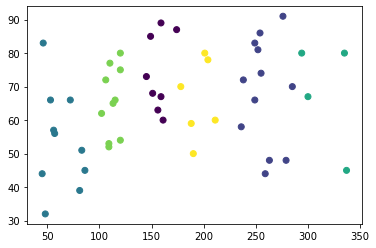

In [123]:
plt.scatter(crime_data.iloc[:,2],crime_data.iloc[:,3],c = y_kmean)


In [124]:
# to get location names of high crime cases 
locations_high_crime_cases = crime_data.loc[crime_data['clusterID'] == 6].iloc[:,0]
locations_high_crime_cases

3      Arkansas
5      Colorado
9       Georgia
24     Missouri
41    Tennessee
42        Texas
Name: location, dtype: object

In [125]:
len(list(locations_high_crime_cases))

6

# Out of 50 states in US, the crime cases is high in 6 states.

# ===============================================================

# The better KMeans clustering is with 3 clusters.

In [136]:
#import data
crime_data_1 = pd.read_csv('crime_data.csv')
crime_data = crime_data_1.copy()
crime_data.drop('Unnamed: 0',axis=1,inplace=True)

# create clusters
kmean_cluster = KMeans(n_clusters=3,random_state=12)

#predict clusterID for each datapoint
y_kmean = kmean_cluster.fit_predict(crime_data)+1

#create Dataframe of clusterIDs 
cluster = pd.DataFrame(y_kmean,columns=['clusterID'])

#insert clusterID column to crime_data_1 dataset(original without scale)
crime_data['clusterID'] = cluster

#insert location
crime_data.insert(loc=0, column='location', value=crime_data_1['Unnamed: 0'])

print('unique cluster IDs : ',crime_data['clusterID'].unique())
print('unique cluster IDs with calue counts:\n{}'.format(crime_data['clusterID'].value_counts()))

crime_data.groupby('clusterID').agg('mean')

unique cluster IDs :  [3 1 2]
unique cluster IDs with calue counts:
2    20
3    16
1    14
Name: clusterID, dtype: int64


,Murder,Assault,UrbanPop,Rape
clusterID,,,,
1,8.214286,173.285714,70.642857,22.842857
2,4.270000,87.550000,59.750000,14.390000
3,11.812500,272.562500,68.312500,28.375000


## conclusion:
The murder cases, assault cases and rape cases are max in 3nd cluster ID, though its population is less than that of in cluster 1.

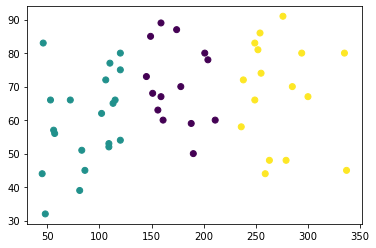

In [137]:

plt.scatter(crime_data.iloc[:,2],crime_data.iloc[:,3],c = y_kmean)



In [138]:
crime_data['clusterID']=crime_data['clusterID'].map({3:'HighCrimeCases',1:'ModerateCrimeCases',2:'LowCrimeCases'})

# to get location names of high crime cases 
locations_high_crime_cases = crime_data.loc[crime_data['clusterID'] == 'HighCrimeCases'].iloc[:,0]
locations_high_crime_cases

0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
Name: location, dtype: object

# ----------------------------------------------------------------------------------------------------------

# Kmeans with scaled data for 3 clusters

In [165]:
crime_data_1 = pd.read_csv('crime_data.csv')
crime_data = crime_data_1.copy()
crime_data.drop('Unnamed: 0',axis=1,inplace=True)

In [166]:
### Data Preprocessing
scaler = MinMaxScaler()
scaler.fit_transform(crime_data)

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [167]:
crime_data = pd.DataFrame(scaler.fit_transform(crime_data),columns=['Murder','Assault','UrbanPop','Rape'])
crime_data.head(2)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240


In [168]:
# create clusters
kmean_cluster = KMeans(n_clusters=3,random_state=12)

#predict clusterID for each datapoint
y_kmean = kmean_cluster.fit_predict(crime_data)+1

#create Dataframe of clusterIDs 
cluster = pd.DataFrame(y_kmean,columns=['clusterID'])

#insert clusterID column to crime_data_1 dataset(original without scale)
crime_data['clusterID'] = cluster

#insert location
crime_data.insert(loc=0, column='location', value=crime_data_1['Unnamed: 0'])

print('unique cluster IDs : ',crime_data['clusterID'].unique())
print('unique cluster IDs with calue counts:\n{}'.format(crime_data['clusterID'].value_counts()))

crime_data.groupby('clusterID').agg('mean')

unique cluster IDs :  [2 3 1]
unique cluster IDs with calue counts:
2    19
3    18
1    13
Name: clusterID, dtype: int64


,Murder,Assault,UrbanPop,Rape
clusterID,,,,
1,0.168675,0.114858,0.340287,0.126019
2,0.694673,0.733958,0.615522,0.566299
3,0.314257,0.338661,0.683616,0.311226


In [169]:
print(19/50,18/50,13/50)

0.38 0.36 0.26


In [170]:
crime_data['clusterID']=crime_data['clusterID'].map({2:'HighCrimeCases',3:'ModerateCrimeCases',1:'LowCrimeCases'})

# to get location names of high crime cases 
locations_high_crime_cases = crime_data.loc[crime_data['clusterID'] == 'HighCrimeCases'].iloc[:,0]
locations_high_crime_cases

0            Alabama
1             Alaska
2            Arizona
4         California
5           Colorado
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
41         Tennessee
42             Texas
Name: location, dtype: object

# ========================================================

# DBSCAN

In [210]:
crime_data_1 = pd.read_csv('crime_data.csv')

In [211]:
crime_data_1.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [212]:
crime_data_1.drop('Unnamed: 0',axis=1,inplace=True)

In [213]:
scaler = StandardScaler()
scaled_crime_data = scaler.fit_transform(crime_data_1)

In [219]:
crime_data_df = pd.DataFrame(scaled_crime_data,columns=['Murder','Assault','UrbanPop','Rape'])
crime_data_df.head(3)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466


In [220]:
dbs = DBSCAN()   #eps=0.5,min_samples=5 -default values

crime_data = crime_data_df.copy()
y_dbs = dbs.fit_predict(crime_data)

In [221]:
crime_data['clusterID'] = y_dbs

In [222]:
crime_data['clusterID'].value_counts()

-1    50
Name: clusterID, dtype: int64

### Hyperparameter Twaeking

In [231]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1,min_samples=5)   #eps=1,min_samples=5
y_dbs = dbs.fit_predict(crime_data)
crime_data['clusterID'] = y_dbs

In [232]:
crime_data['clusterID'].value_counts()

 0    24
-1    23
 1     3
Name: clusterID, dtype: int64

### 23 outliers are present in this clustering model.

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [236]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.2,min_samples=5)   #eps=1.2,min_samples=5 
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 1    32
-1    13
 0     5
Name: class_pr, dtype: int64

### 13 outliers are still present.

In [347]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.25,min_samples=5)   #eps=1.25,min_samples=5 
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 2    32
 1     7
-1     6
 0     5
Name: class_pr, dtype: int64

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [355]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.25,min_samples=1)   #eps=1.2,min_samples=5 
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

2    39
0     7
3     2
1     1
4     1
Name: class_pr, dtype: int64

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

###### Let us tweak both min_samples and eps(radius)

In [251]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.1,min_samples=2)
y_dbs = dbs.fit_predict(crime_data)

crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 2    30
 0     7
 1     7
-1     6
Name: class_pr, dtype: int64

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [253]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.05,min_samples=3)
y_dbs = dbs.fit_predict(crime_data)

crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 1    29
-1     8
 0     6
 3     4
 2     3
Name: class_pr, dtype: int64

In [271]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.25,min_samples=2)
y_dbs = dbs.fit_predict(crime_data)

crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 1    39
 0     7
-1     2
 2     2
Name: class_pr, dtype: int64

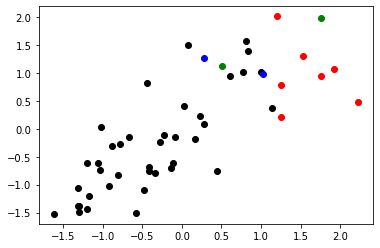

In [273]:
plt.scatter(crime_data[crime_data['class_pr']==1].iloc[:,0],crime_data[crime_data['class_pr']==1].iloc[:,1],color="black")
plt.scatter(crime_data[crime_data['class_pr']==0].iloc[:,0],crime_data[crime_data['class_pr']==0].iloc[:,1],color="red")
plt.scatter(crime_data[crime_data['class_pr']==2].iloc[:,0],crime_data[crime_data['class_pr']==2].iloc[:,1],color="blue")
plt.scatter(crime_data[crime_data['class_pr']==-1].iloc[:,0],crime_data[crime_data['class_pr']==-1].iloc[:,1],color="green")
plt.show()

In [300]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.1,min_samples=2)
y_dbs = dbs.fit_predict(crime_data)

crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 2    30
 0     7
 1     7
-1     6
Name: class_pr, dtype: int64

In [305]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.185,min_samples=2)
y_dbs = dbs.fit_predict(crime_data)

crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 1    37
 0     7
-1     6
Name: class_pr, dtype: int64

In [299]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.2,min_samples=2)
y_dbs = dbs.fit_predict(crime_data)

crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 1    38
 0     7
-1     5
Name: class_pr, dtype: int64

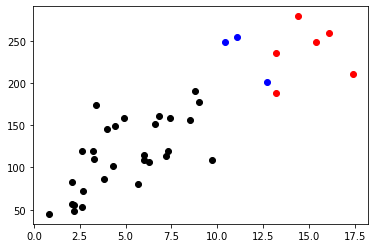

In [307]:
from sklearn.preprocessing import StandardScaler
crime_data = crime_data_1.copy()

scaler = StandardScaler()
scled_crime_data = scaler.fit_transform(crime_data)
dbs = DBSCAN(eps=1.05,min_samples=3)
y_dbs = dbs.fit_predict(scled_crime_data)

crime_data['clusterID'] = y_dbs

crime_data['clusterID'].value_counts()

plt.scatter(crime_data[crime_data['clusterID']==1].iloc[:,0],crime_data[crime_data['clusterID']==1].iloc[:,1],color="black")
plt.scatter(crime_data[crime_data['clusterID']==0].iloc[:,0],crime_data[crime_data['clusterID']==0].iloc[:,1],color="red")
plt.scatter(crime_data[crime_data['clusterID']==2].iloc[:,0],crime_data[crime_data['clusterID']==2].iloc[:,1],color="blue")
plt.show()

In [308]:
crime_data['clusterID'].value_counts()

 1    29
-1     8
 0     6
 3     4
 2     3
Name: clusterID, dtype: int64

# There are 6 outliers.

In [357]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=0.5,min_samples=8)  
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

-1    50
Name: class_pr, dtype: int64

In [358]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=0.3,min_samples=8)  
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

-1    50
Name: class_pr, dtype: int64

In [359]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=0.8,min_samples=8)  
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

-1    50
Name: class_pr, dtype: int64

In [360]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1,min_samples=8)  
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

-1    32
 0    18
Name: class_pr, dtype: int64

In [361]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.5,min_samples=8)  
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 0    48
-1     2
Name: class_pr, dtype: int64

In [362]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.2,min_samples=8)  
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 0    30
-1    20
Name: class_pr, dtype: int64

In [363]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.3,min_samples=8)  
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 0    33
-1    17
Name: class_pr, dtype: int64

In [364]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.35,min_samples=8)  
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 1    32
 0     8
 2     6
-1     4
Name: class_pr, dtype: int64

In [366]:
crime_data = crime_data_df.copy()

dbs = DBSCAN(eps=1.4,min_samples=8)  
y_dbs = dbs.fit_predict(crime_data)
crime_data['class_pr'] = y_dbs

crime_data['class_pr'].value_counts()

 2    30
 1    10
 0     8
-1     2
Name: class_pr, dtype: int64

In [371]:
print(30/50,10/50,8/50,2/50)

0.6 0.2 0.16 0.04


#### The above clustering is good since it has just 2 outliers.